In [59]:
import geopandas as gp
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import xarray as xr
import oceansdb as db
import statistics as st

In [38]:
wocean=gp.read_file('World_Seas.shp')

In [39]:
# wocean['NAME'].loc[28:80]

In [40]:
Ecoord= pd.read_csv('longitude.csv')
Ncoord= pd.read_csv('latitude.csv')
Ecoord2= Ecoord.iloc[0:, 157:363]
Ncoord2= Ncoord.iloc[0:, 157:363]

In [80]:
Ecoordmean= Ecoord2.mean().mean()
Ncoordmean=Ncoord2.mean().mean()

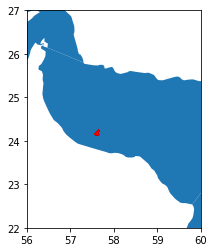

In [41]:
fig, ax = plt.subplots(1,1)
wocean.plot(ax=ax)
plt.xlim(56,60)
plt.ylim(22,27)
plt.scatter(Ecoord2, Ncoord2, color='r',marker='o', s=0.01)

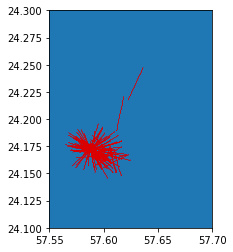

In [42]:
fig, ax = plt.subplots(1,1)
wocean.plot(ax=ax)
plt.xlim(57.55,57.7)
plt.ylim(24.1,24.3)
plt.scatter(Ecoord2, Ncoord2, marker='o', color='r', s=0.0001)

In [43]:
iho= gp.read_file('iho.shp')

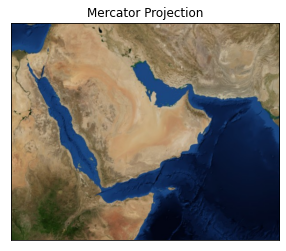

In [44]:
m = Basemap(projection='merc',llcrnrlat=5,urcrnrlat=35,llcrnrlon=30,urcrnrlon=70,lat_ts=20,resolution='c')

#m.drawcoastlines()
#m.fillcontinents(color='coral',lake_color='aqua')

# draw parallels and meridians.
#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
#m.drawmapboundary(fill_color='aqua')
plt.title("Mercator Projection")
m.bluemarble()

plt.show()
#plt.scatter(Ecoord2, Ncoord2, marker='o', color='r', s=0.1)

In [45]:
woa= db.WOA()
woa.keys()

dict_keys(['sea_water_temperature', 'sea_water_salinity', 'dissolved_oxygen'])

In [51]:
ds= xr.open_dataset('gebco.nc')
ds

<xarray.Dataset>
Dimensions:    (lat: 1765, lon: 2288)
Coordinates:
  * lat        (lat) float64 20.26 20.26 20.27 20.27 ... 27.6 27.6 27.61 27.61
  * lon        (lon) float64 55.69 55.69 55.69 55.7 ... 65.2 65.21 65.21 65.21
Data variables:
    elevation  (lat, lon) int16 ...
Attributes: (12/36)
    title:                           The GEBCO_2021 Grid - a continuous terra...
    summary:                         The GEBCO_2021 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/c6612cbe-50b3-0cff-e053-6c8...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/c6612cbe-50b3-0cff-e053-6c8...
    references:                      DOI: 10.5285/c6612cbe-50b3-0cff-e053-6c8...
    node_offset:                     1.0

Text(0.5, 1.0, 'Gulf of Oman with shown position of sampled area')

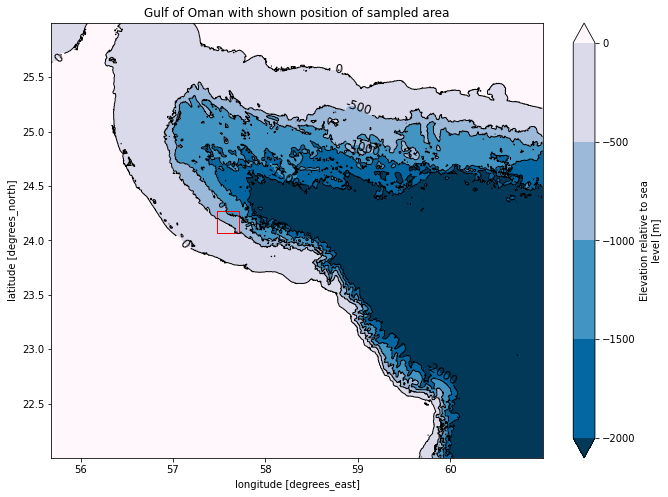

In [162]:
cond1= (ds.lat>22) & (ds.lat<26) & (ds.lon>47) & (ds.lon<61) 
dsone = ds.where(cond1 ,drop=True) #Restraining the area I'm working in

fig, axes= plt.subplots(figsize=[11,8])
levels= [0, -500,-1000,-1500, -2000]


dsone.elevation.plot.contourf( ax=axes, cmap='PuBu_r', levels=levels, vmin=-4000, vmax=0)

CS= dsone.elevation.plot.contour(ax=axes, colors=('k'), linestyles=('-'), 
                          linewidths= 1, levels=levels, vmin=-4000, vmax=0 )

plt.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=12) #contour line labels


plt.scatter(Ecoordmean, Ncoordmean, color='w', marker='s',facecolors='none', edgecolor='r', s=500)

plt.title('Gulf of Oman with shown position of sampled area')

Text(0.5, 1.0, 'Glider transect in shelf area of Gulf of Oman')

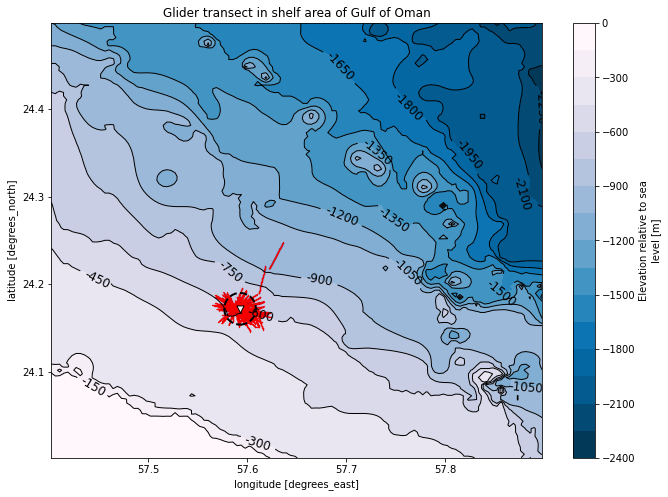

In [156]:
cond= (ds.lat>24) & (ds.lat<24.5) & (ds.lon>57.4) & (ds.lon<57.9) 
dstwo = ds.where(cond,drop=True) #Restraining the area I'm working in
levels=20

fig, axes= plt.subplots(figsize=[11,8])

dstwo.elevation.plot.contourf(ax=axes, cmap= 'PuBu_r', levels=levels)

#Linjen mellan djupnivåerna
CS= dstwo.elevation.plot.contour(ax=axes, colors=('k'), linestyles=('-'), 
                          linewidths= 1, levels=levels )

#contour line labels
plt.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=12) 

#plot the gliderpaths (not sure how I'm going to visualize this in a nice way)
plt.scatter(Ecoord2, Ncoord2, marker='o', color='r', s=0.001)

#plot the dashed circlemarker
plt.scatter(Ecoordmean, Ncoordmean, marker='o', facecolors='none', s=1000, edgecolor='k', 
            linestyles='--', linewidths= 2 )

#plot the average position of data
plt.scatter(Ecoordmean, Ncoordmean, marker='v', color='w', s=50, edgecolor='k') #linestyles='--'

plt.title('Glider transect in shelf area of Gulf of Oman')

57.61755554208931